<a href="https://colab.research.google.com/github/KArimCHidekh/Deeplearing_models/blob/main/lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow-addons==0.8.3
!pip install tensorflow==2.2.0-rc3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 7.5 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement tensorflow==2.2.0-rc3 (from versions: 1.13.1, 1.13.2, 1.14.0, 1.15.0, 1.15.2, 1.15.3, 1.15.4, 1.15.5, 2.0.0, 2.0.1, 2.0.2, 2.0.3, 2.0.4, 2.1.0, 2.1.1, 2.1.2, 2.1.3, 2.1.4, 2.2.0, 2.2.1, 2.2.2, 2.2.3, 2.3.0, 2.3.1, 2.3.2, 2.3.3, 2.3.4, 2.4.0, 2.4.1, 2.4.2, 2.4.3, 2.4.4, 2.5.0, 2.5.1, 2.5.2, 2.5.3, 2.6.0rc0, 2.6.0rc1, 2.6.0rc2, 2.6.0, 2.6.0+zzzcolab20220506153740, 2.6.1, 2.6.2, 2.6.3, 2.6.4, 2.6.4+zzzcolab20220516125453, 2.6.5, 2.6.5+zzzcolab20220523104206, 2.7.0rc0, 2.7.0rc1, 2.7.0, 2.7.0+zzzcolab20220506150900, 2.7.1, 2.7.2, 2.7.2+zzzcolab20220516114640, 2.7.3, 2.7.3+zzzcolab20220523111007, 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.0+zzzcolab20220506162203, 2.8.1, 2.8.1+zzzcolab202205

In [ ]:
!pip install tensorflow-addons==0.16.1
import tensorflow_addons as tfa

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 6.7 MB/s 
  Attempting uninstall: tensorflow-addons
    Found existing installation: tensorflow-addons 0.8.3
    Uninstalling tensorflow-addons-0.8.3:
      Successfully uninstalled tensorflow-addons-0.8.3


In [ ]:
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install tensorflow==2.7.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     \ 665.5 MB 240 kB/s
     |████████████████████████████████| 463 kB 6.9 MB/s 
     |████████████████████████████████| 1.3 MB 45.8 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.5.3
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.8.2+zzzcolab20220527125636
    Uninstalling tensorflow-2.8.2+zzzcolab20220527125636:
      Successfully uninstalled tensorflow-2.8.2+zzzcolab20220527125636


In [ ]:
# Importing required libraries
import nltk
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from textblob import Word
from sklearn.preprocessing import LabelEncoder
from collections import Counter
import wordcloud
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow_addons as tfa
import nltk
 

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.


True

In [ ]:
df = pd.read_csv('Tweets.csv')
df.sample(5)


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
5859,568541825092304897,negative,1.0000,Can't Tell,0.6429,Southwest,NaN,TheeSamSanders,NaN,0,@SouthwestAir don't ever tweet me again,NaN,2015-02-19 14:45:08 -0800,On It,Quito
1351,569785074910154752,neutral,0.6684,NaN,NaN,United,NaN,The5y5Adm1n,NaN,0,@united followed you and DM'd you,NaN,2015-02-23 01:05:22 -0800,NaN,NaN
13476,569853568200503296,negative,0.6801,Customer Service Issue,0.3424,American,NaN,nic_tudobem,NaN,0,@AmericanAir Trying to make an online Flight B...,NaN,2015-02-23 05:37:32 -0800,New York,NaN
7350,569650936911683586,negative,0.6633,Late Flight,0.6633,Delta,NaN,jessbutl,NaN,0,@JetBlue Tx for the info. Just don't understan...,NaN,2015-02-22 16:12:21 -0800,"Brooklyn, NY",NaN
4318,567627253991735296,negative,1.0000,Bad Flight,0.3611,United,NaN,DBsViewOnThings,NaN,0,@united please see a flight attendant for what...,NaN,2015-02-17 02:10:58 -0800,NaN,Atlantic Time (Canada)


In [ ]:
import nltk
nltk.download('stopwords')

import re
# Uncomment to download "stopwords"
# nltk.download("stopwords")
from nltk.corpus import stopwords

def text_preprocessing(s):
    """
    - Lowercase the sentence
    - Change "'t" to "not"
    - Remove "@name"
    - Isolate and remove punctuations except "?"
    - Remove other special characters
    - Remove stop words except "not" and "can"
    - Remove trailing whitespace
    """
    s = s.lower()
    # Change 't to 'not'
    s = re.sub(r"\'t", " not", s)
    # Remove @name
    s = re.sub(r'(@.*?)[\s]', ' ', s)
    # Isolate and remove punctuations except '?'
    s = re.sub(r'([\'\"\.\(\)\!\?\\\/\,])', r' \1 ', s)
    s = re.sub(r'[^\w\s\?]', ' ', s)
    # Remove some special characters
    s = re.sub(r'([\;\:\|•«\n])', ' ', s)
    # Remove stopwords except 'not' and 'can'
    s = " ".join([word for word in s.split()
                  if word not in stopwords.words('english')
                  or word in ['not', 'can']])
    # Remove trailing whitespace
    s = re.sub(r'\s+', ' ', s).strip()
    s = re.sub(r'@[A-Za-z0-9]+','',s)
    s = re.sub(r'#' , '',s)
    s= re.sub(r'RT[\s]+','',s)
    s = re.sub(r'https?:\/\/\S+','',s)
    s = re.sub(r'&amp;', '&', s)

    # remove numbers
    s = re.sub(r'\d+', '', s)
    return s


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import pandas as pd
import numpy as np
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import re


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
Data = df[['text','airline_sentiment']]
Data.sample(5)

,text,airline_sentiment
8203,@JetBlue Awww thank you B6! Glad to hear it! ...,positive
976,@united first time flying with United. Also la...,negative
12011,@AmericanAir Thanks so much!,neutral
7102,@JetBlue Tell me more 😳...\n\nBecause I need a...,neutral
12311,@AmericanAir Connection is US2065,neutral


In [ ]:
df['text'] = df['text'].apply(lambda x: text_preprocessing(x))
Data.sample(5)

,text,airline_sentiment
8980,@USAirways I finally got through on the phone ...,negative
4369,@SouthwestAir I'm following now,neutral
417,@VirginAmerica how come you don't have an iPho...,negative
4205,@united i got email that my reservations got C...,negative
1928,@united thanks for leaving our 3 year old in h...,positive


In [ ]:
Data['tokenized_tweets'] = Data.apply(lambda row : nltk.word_tokenize(str(row['text'])),axis = 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
Data.sample(5)

,text,airline_sentiment,tokenized_tweets
8065,good address send feedback email ?,neutral,"[good, address, send, feedback, email, ?]"
10514,paying ? fly damn plane not one announcement c...,negative,"[paying, ?, fly, damn, plane, not, one, announ..."
439,love taking backyard consumers win biz competes,positive,"[love, taking, backyard, consumers, win, biz, ..."
2543,yes people also,negative,"[yes, people, also]"
1743,hire extra customer service reps minute wait t...,negative,"[hire, extra, customer, service, reps, minute,..."


In [ ]:
def lemma(data):
    return " ".join([Word(word).lemmatize() for word in data])
Data['lemmatized_tweets']= Data['tokenized_tweets'].apply(lambda x: lemma(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
Data.sample(5)

,text,airline_sentiment,tokenized_tweets,lemmatized_tweets
10957,worst minute delay boston not weather relate f...,negative,"[worst, minute, delay, boston, not, weather, r...",worst minute delay boston not weather relate f...
10641,flight four subsequent delays destroyed travel...,negative,"[flight, four, subsequent, delays, destroyed, ...",flight four subsequent delay destroyed travel ...
3111,good not die anything say get pay,negative,"[good, not, die, anything, say, get, pay]",good not die anything say get pay
1913,show available seats need honor shouldnt spend...,negative,"[show, available, seats, need, honor, shouldnt...",show available seat need honor shouldnt spend ...
7525,flight orlando unable serve hot bevies made mo...,positive,"[flight, orlando, unable, serve, hot, bevies, ...",flight orlando unable serve hot bevy made movi...


In [ ]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 500
# Max number of words in each tweets.
MAX_SEQUENCE_LENGTH = 75
# This is fixed.
EMBEDDING_DIM = 100

tokenizer = Tokenizer(num_words=MAX_NB_WORDS, split=' ') 
tokenizer.fit_on_texts(Data.lemmatized_tweets.values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 14858 unique tokens.


In [ ]:
X = tokenizer.texts_to_sequences(Data.lemmatized_tweets.values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (14640, 75)


In [ ]:
Y = pd.get_dummies(Data.airline_sentiment).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (14640, 3)


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(11712, 75) (11712, 3)
(2928, 75) (2928, 3)


In [ ]:
from numpy.random import seed
seed(1)
import tensorflow
tensorflow.random.set_seed(2)
f1 = tfa.metrics.F1Score(36,'micro' or 'macro')
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy',f1])

epochs = 7
batch_size = 64

In [ ]:
history_1 = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/7
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
165/165 [==============================] - ETA: 0s - loss: 0.7374 - accuracy: 0.6955 - f1_score: 0.6955WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7f289050e050> and will run it as-is.
Please report this to the TensorFlow team. When fili

In [ ]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

92/92 [==============================] - 4s 47ms/step - loss: 0.5120 - accuracy: 0.7903 - f1_score: 0.7903
Test set
  Loss: 0.512
  Accuracy: 0.790


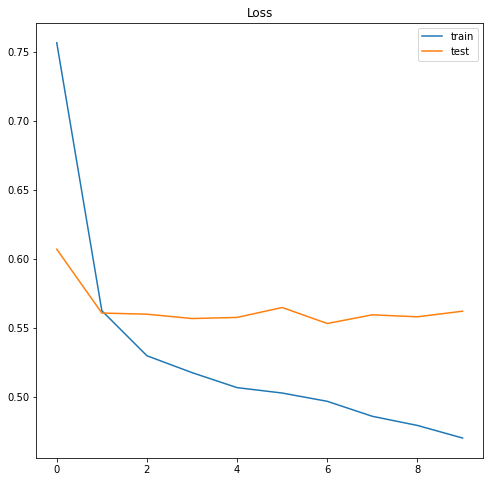

In [ ]:
plt.figure(figsize=(8, 8))
plt.title('Loss')
plt.plot(history_1.history['loss'], label='train')
plt.plot(history_1.history['val_loss'], label='test')
plt.legend()
plt.show();

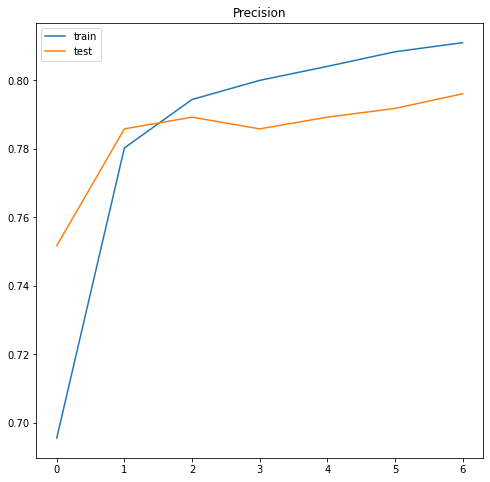

In [ ]:
plt.figure(figsize=(8, 8))
plt.title('Precision')
plt.plot(history_1.history['accuracy'], label='train')
plt.plot(history_1.history['val_accuracy'], label='test')
plt.legend()
plt.show();

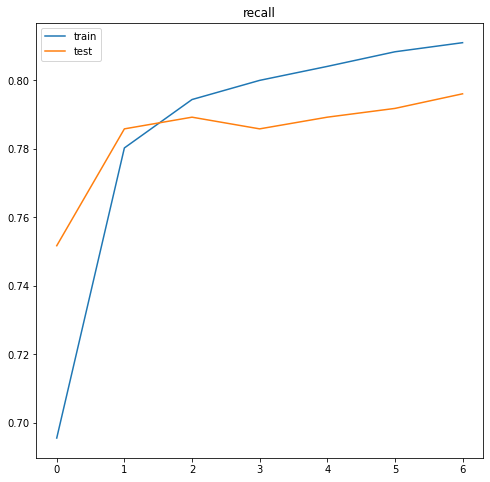

In [ ]:
plt.figure(figsize=(8, 8))
plt.title('recall')
plt.plot(history_1.history['f1_score'], label='train')
plt.plot(history_1.history['val_f1_score'], label='test')
plt.legend()
plt.show();